<a href="https://colab.research.google.com/github/GV-A/Intern_Career-Task-1/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TASK 1:Exploratory Data Analysis (EDA) in Business Analytics
import pandas as pd
import numpy as np

#DATA ACQUISATION AND UNDERSTANDING
data = pd.read_csv("/vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
data.isnull().any().any()

True

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
data.shape

(16598, 11)

In [ ]:
#DATA CLEANING AND PREPARATION


<Axes: >

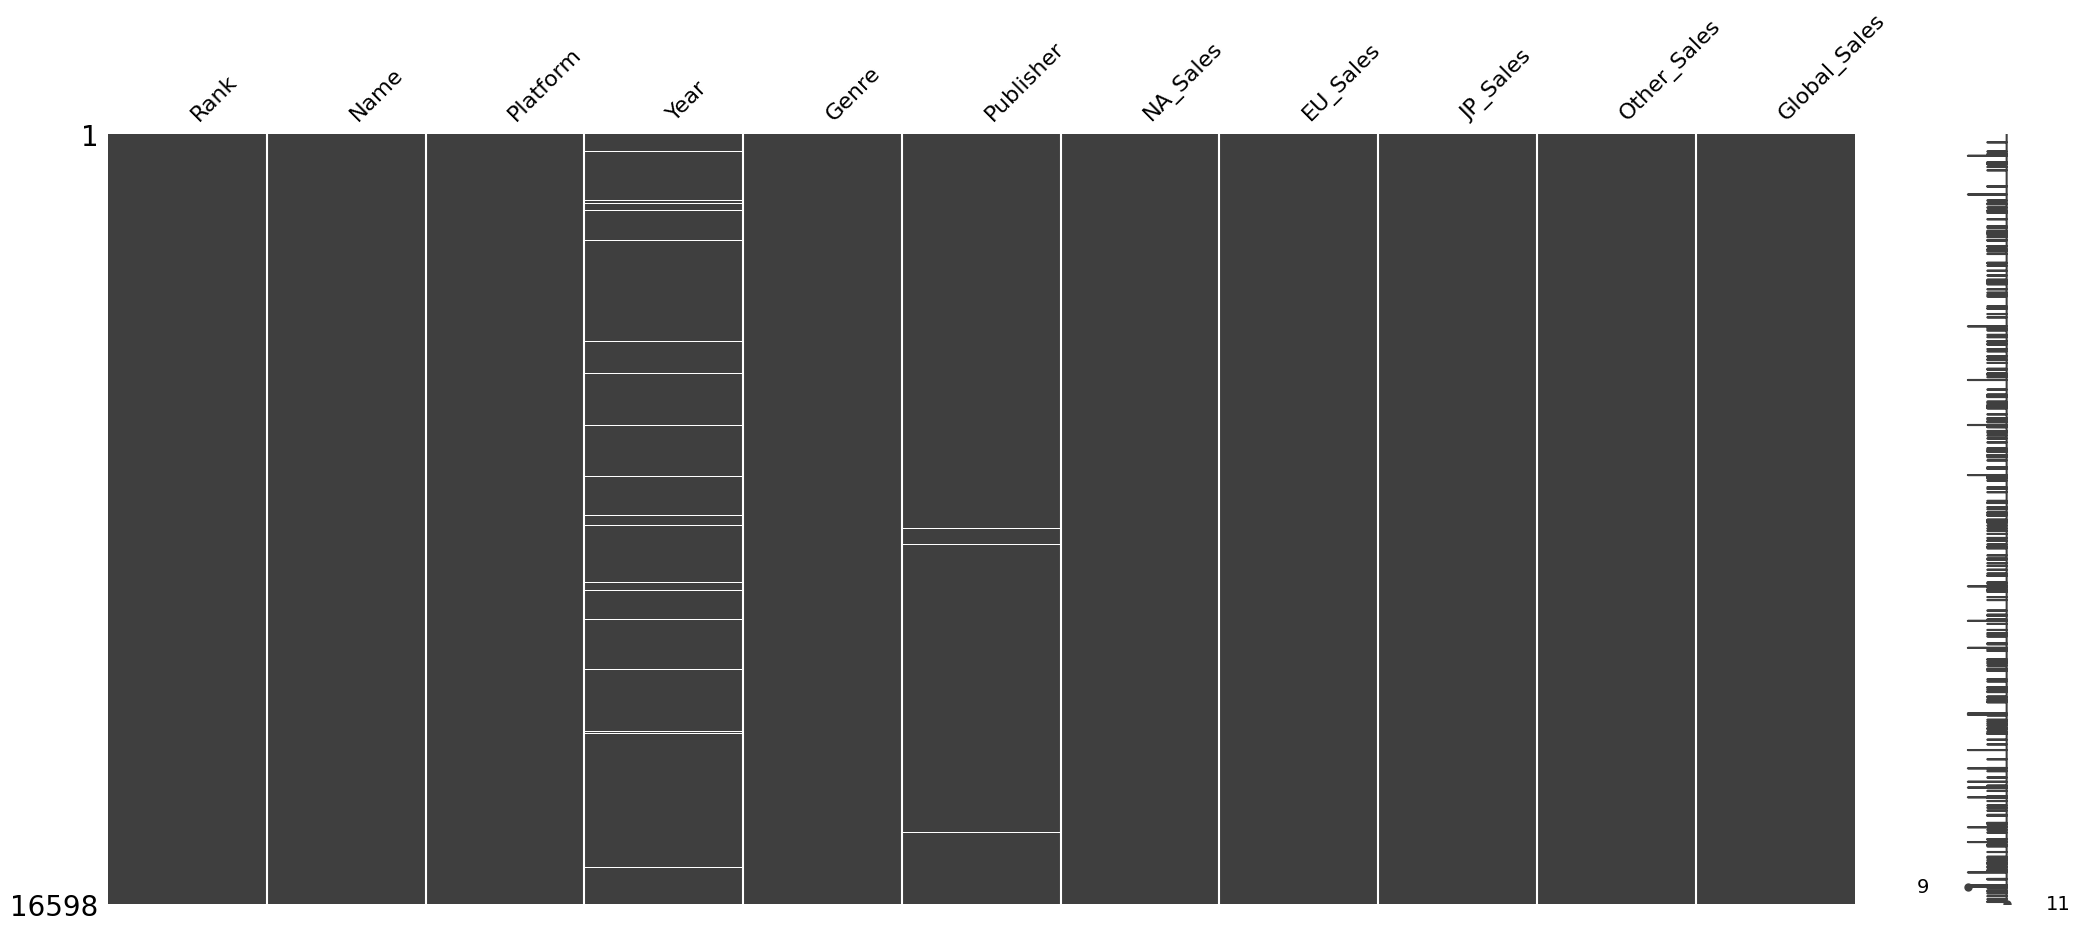

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
data[data.isnull().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [ ]:
col_qual = data.select_dtypes(include = ['object']).columns
data_qual = data[col_qual]
print("Number of unique values in each qualitative variable")
print("All:  {}".format(len(data)))
for col in data_qual.columns:
    nb_unique = len(data[col].unique())
    print("{}: {}".format(col[:4], nb_unique))

Number of unique values in each qualitative variable
All:  16598
Name: 11493
Plat: 31
Genr: 12
Publ: 579


In [ ]:
print(len(data[data[['Name']].duplicated()]))
print(len(data[data[['Name', 'Platform']].duplicated()]))
print(len(data[data[['Name', 'Platform', 'Year']].duplicated()]))
data[data[['Name', 'Platform', 'Year']].duplicated(keep=False)]

5105
5
2


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
603,604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.00,0.22,2.56
14997,15000,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02
14999,15002,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02
16127,16130,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01


In [ ]:
#DESCRIPTIVE ANALYSIS

In [ ]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [27]:
data.groupby('Name').mean()

<ipython-input-27-80d55ff8fde0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Name').mean()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,
'98 Koshien,4756.0,1998.0,0.150,0.10,0.12,0.03,0.410
.hack//G.U. Vol.1//Rebirth,8359.0,2006.0,0.000,0.00,0.17,0.00,0.170
.hack//G.U. Vol.2//Reminisce,7109.0,2006.0,0.110,0.09,0.00,0.03,0.230
.hack//G.U. Vol.2//Reminisce (jp sales),8604.0,2006.0,0.000,0.00,0.16,0.00,0.160
.hack//G.U. Vol.3//Redemption,8306.0,2007.0,0.000,0.00,0.17,0.00,0.170
...,...,...,...,...,...,...,...
thinkSMART: Chess for Kids,16417.0,2011.0,0.010,0.00,0.00,0.00,0.010
uDraw Studio,628.0,2010.0,1.670,0.58,0.00,0.20,2.460
uDraw Studio: Instant Artist,11681.5,2011.0,0.045,0.05,0.00,0.01,0.105


In [ ]:
print(data.std())

Rank            4791.853933
Year               5.828981
NA_Sales           0.816683
EU_Sales           0.505351
JP_Sales           0.309291
Other_Sales        0.188588
Global_Sales       1.555028
dtype: float64


<ipython-input-15-a810e4c31d42>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.std())


In [ ]:
data.mode()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Need for Speed: Most Wanted,DS,2009.0,Action,Electronic Arts,0.0,0.0,0.0,0.0,0.02
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16594,16597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16595,16598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16596,16599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


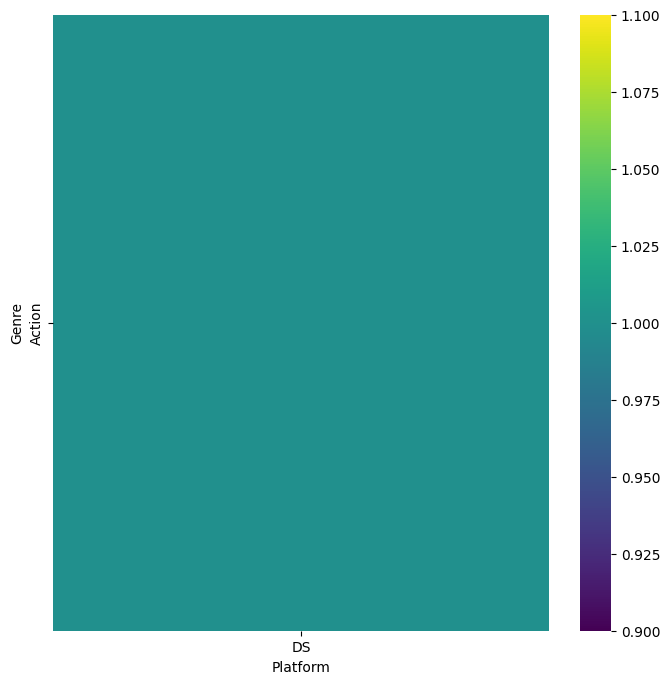

In [ ]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Genre'].value_counts()
    for x_label, grp in _df_21.groupby('Platform')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Platform')
_ = plt.ylabel('Genre')

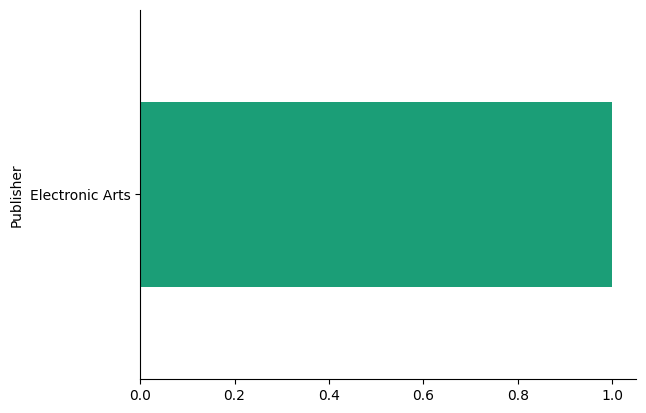

In [ ]:

_df_7.groupby('Publisher').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

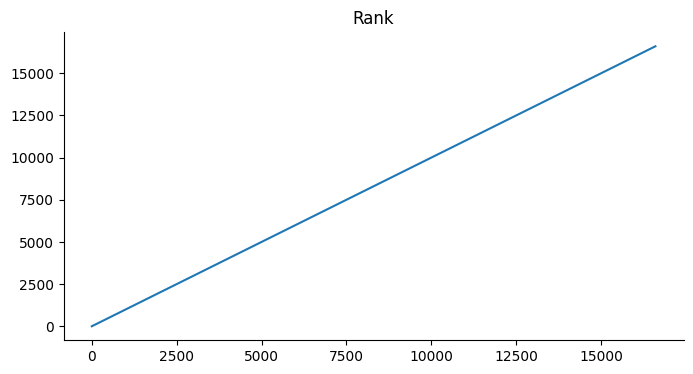

In [ ]:
from matplotlib import pyplot as plt
_df_16['Rank'].plot(kind='line', figsize=(8, 4), title='Rank')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

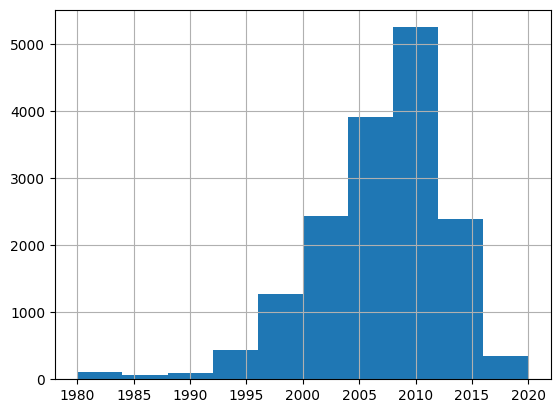

In [ ]:
data['Year'].hist()

<Axes: >

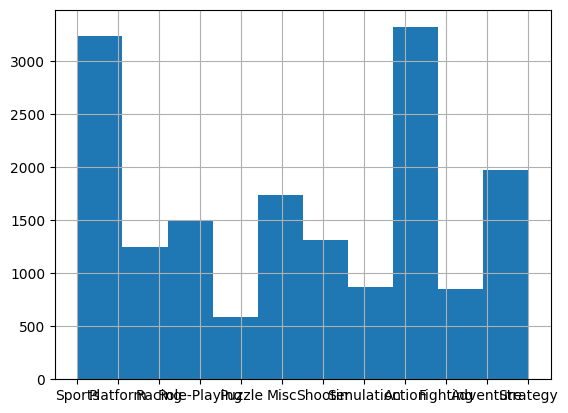

In [ ]:
data['Genre'].hist()

<Axes: >

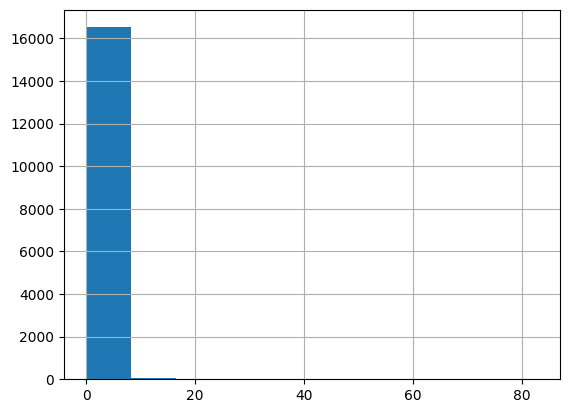

In [ ]:
data['Global_Sales'].hist()


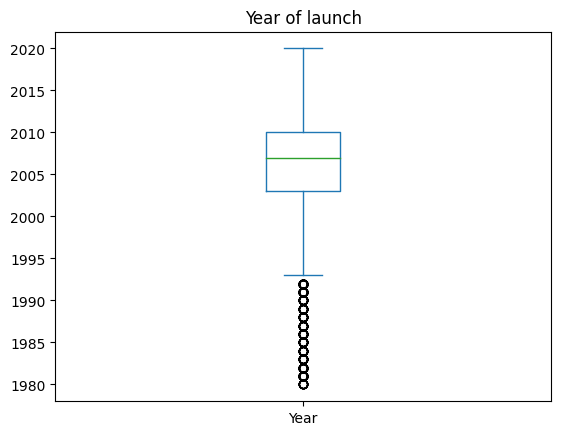

In [ ]:
data['Year'].plot(kind='box', title='Year of launch')
plt.show()

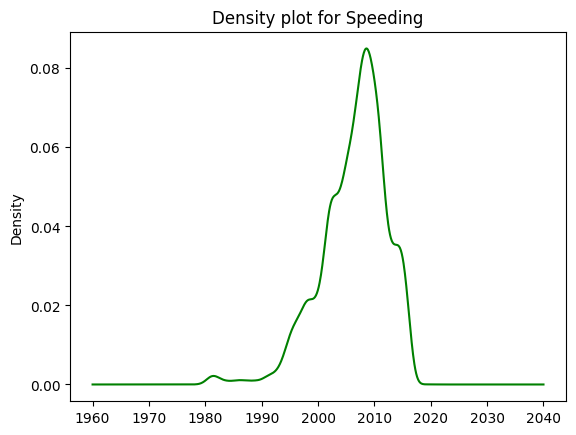

In [ ]:
data.Year.plot.density(color='green')
plt.title('Density plot for Year')
plt.show()

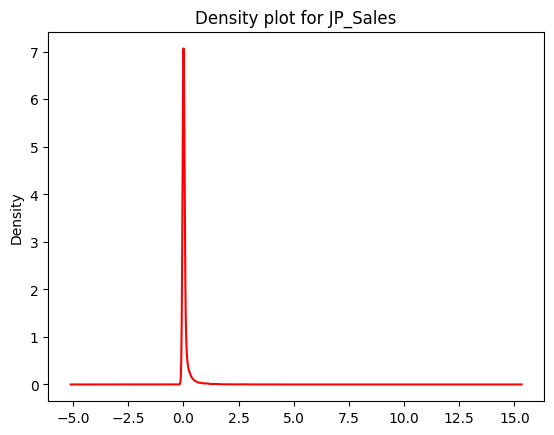

In [ ]:
data.JP_Sales.plot.density(color='red')
plt.title('Density plot for JP_Sales')
plt.show()

In [ ]:
#SEGMENTATION AND PROFILING

In [ ]:
data['sales_segment'] = data['Global_Sales'].apply(lambda x: 'high' if x >= 10 else 'low')
print(data['sales_segment'])


0        high
1        high
2        high
3        high
4        high
         ... 
16593     low
16594     low
16595     low
16596     low
16597     low
Name: sales_segment, Length: 16598, dtype: object


In [ ]:
data.groupby(data.Recency).sum().reset_index()


<ipython-input-64-e68d0a7c4968>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(data.Recency).sum().reset_index()


,Recency,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,5959,2020,0.27,0.00,0.00,0.02,0.29
1,3,47078,6051,0.00,0.00,0.05,0.00,0.05
2,4,3931660,693504,22.66,26.76,13.70,7.75,70.93
3,5,6015847,1237210,102.82,97.71,33.72,30.01,264.44
4,6,4841789,1172148,131.97,125.65,39.46,40.02,337.05
5,7,4398356,1099098,154.77,125.80,47.59,39.82,368.11
6,8,5554958,1321884,154.96,118.78,51.74,37.82,363.54
7,9,10017438,2290529,241.06,167.44,53.04,54.39,515.99
8,10,11059005,2530590,304.24,176.73,59.49,59.90,600.45
9,11,12420219,2874879,338.85,191.59,61.89,74.77,667.30


In [ ]:
data.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [ ]:
data.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [ ]:
data.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [ ]:
def fun(value):
    if value > 30:
        return "Yes"
    else:
        return "No"

data['Sales'] = data['Global_Sales'].apply(fun)
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,sales_segment,Recency,Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,high,14,Yes
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,high,35,Yes
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,high,12,Yes
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,high,11,Yes
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,high,24,Yes
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,high,31,Yes
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,high,14,Yes
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,high,14,No
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,high,11,No
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,high,36,No


In [ ]:
frequency_df = data.drop_duplicates().groupby(
    by=['Name'], as_index=False)['Year'].count()
frequency_df.columns = ['Name', 'Frequency']
frequency_df.head()

,Name,Frequency
0,'98 Koshien,1
1,.hack//G.U. Vol.1//Rebirth,1
2,.hack//G.U. Vol.2//Reminisce,1
3,.hack//G.U. Vol.2//Reminisce (jp sales),1
4,.hack//G.U. Vol.3//Redemption,1


In [ ]:

data['Total'] = data['Global_Sales']
monetary_df = data.groupby(by='Name', as_index=False)['Total'].sum()
monetary_df.columns = ['Name', 'Monetary']
monetary_df.head()

,Name,Monetary
0,'98 Koshien,0.41
1,.hack//G.U. Vol.1//Rebirth,0.17
2,.hack//G.U. Vol.2//Reminisce,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.16
4,.hack//G.U. Vol.3//Redemption,0.17


In [ ]:
fm_df = frequency_df.merge(monetary_df, on='Name')
fm_df.head()

,Name,Frequency,Monetary
0,'98 Koshien,1,0.41
1,.hack//G.U. Vol.1//Rebirth,1,0.17
2,.hack//G.U. Vol.2//Reminisce,1,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),1,0.16
4,.hack//G.U. Vol.3//Redemption,1,0.17


In [ ]:
#CORRELATION AND TRENDS

In [ ]:
matrix = data.corr()
print(matrix)

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178814 -0.401362 -0.379123 -0.267785    -0.332986   
Year          0.178814  1.000000 -0.091402  0.006014 -0.169316     0.041058   
NA_Sales     -0.401362 -0.091402  1.000000  0.767727  0.449787     0.634737   
EU_Sales     -0.379123  0.006014  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.267785 -0.169316  0.449787  0.435584  1.000000     0.290186   
Other_Sales  -0.332986  0.041058  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.427407 -0.074735  0.941047  0.902836  0.611816     0.748331   

              Global_Sales  
Rank             -0.427407  
Year             -0.074735  
NA_Sales          0.941047  
EU_Sales          0.902836  
JP_Sales          0.611816  
Other_Sales       0.748331  
Global_Sales      1.000000  


<ipython-input-3-361bb74a0668>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = data.corr()


<ipython-input-6-b1e80a3c7fc9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = data.corr().round(2)


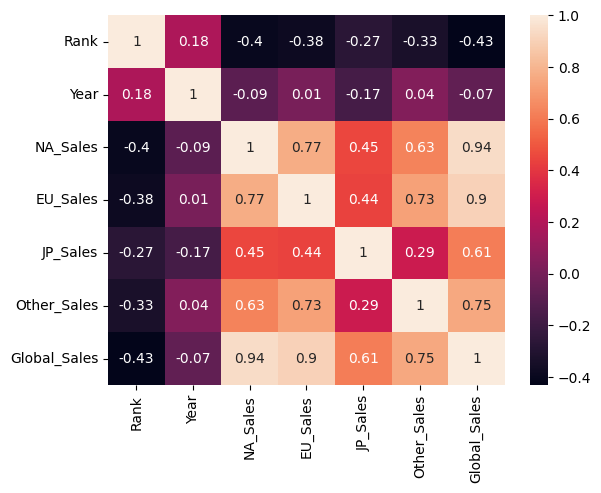

In [ ]:
# Visualizing a Pandas Correlation Matrix Using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
matrix = data.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
# calculate correlation coefficient between EU_Sales and Global_Sales
correlation = data['EU_Sales'].corr(data["Global_Sales"])
print(correlation)
if correlation > 0.5 and correlation <1.0:
  print("Good correlation")
else:
  print("Bad correlation")

0.9028358134817429
Good correlation


In [ ]:
# calculate correlation coefficient between Other_Sales and Global_Sales
correlation = data['Other_Sales'].corr(data["Global_Sales"])
print(correlation)
if correlation > 0.5 and correlation <1.0:
  print("Good correlation")
else:
  print("Bad correlation")

0.7483308464077965
Good correlation


In [ ]:
# calculate correlation coefficient between EU_Sales and JP_Sales
correlation = data['EU_Sales'].corr(data["JP_Sales"])
print(correlation)
if correlation > 0.5 and correlation <1.0:
  print("Good correlation")
else:
  print("Bad correlation")

0.4355844528091811
Bad correlation


In [ ]:
# calculate correlation coefficient between JP_Sales and NA_Sales
correlation = data['JP_Sales'].corr(data["NA_Sales"])
print(correlation)
if correlation > 0.5 and correlation <1.0:
  print("Good correlation")
else:
  print("Bad correlation")

0.4497874070704247
Bad correlation


In [ ]:
pip install data_patterns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 7.9 MB/s eta 0:00:00


In [ ]:
import data_patterns
data.set_index('Name', inplace=True)
# creating a pattern mixer object
miner = data_patterns.PatternMiner(data)
# finding the pattern in the dataframe
# name is optional
# other patterns which can be used  ‘>’, ‘<’, ‘<=’, ‘>=’, ‘!=’, ‘sum’
df_patterns = miner.find({'name': 'equal values',
                          'pattern': '=',
                          'parameters': {"min_confidence": 0.5,
                                         "min_support": 2,
                                         "decimal": 8}})
# getting the analyzed dataframe
df_results = miner.analyze(data)
# printing the analyzed results
print(df_results)

100%|██████████| 7/7 [00:00<00:00, 362.18it/s]
/usr/local/lib/python3.10/dist-packages/data_patterns/data_patterns.py:475: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_patterns = df_patterns.append(
100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                                                    result_type    pattern_id  \
index                                                                           
Wii Sports                                                False  equal values   
Super Mario Bros.                                         False  equal values   
Mario Kart Wii                                            False  equal values   
Wii Sports Resort                                         False  equal values   
Pokemon Red/Pokemon Blue                                  False  equal values   
...                                                         ...           ...   
Neo Angelique Special                                      True  equal values   
Real Rode                                                  True  equal values   
Mezase!! Tsuri Master DS                                   True  equal values   
Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shirub...         True  equal values   
Eiyuu Densetsu: Sora no Kise